**Loading and analyzing data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [4]:
df.shape

(54808, 14)

In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 14)


In [8]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


**Filling nulls**

İ used the mode method for object data types and the median method for float data types in order to fill null values

In [9]:
df['education'].mode()

,education
0,Bachelor's


In [10]:
df['previous_year_rating'].median()

3.0

In [11]:
# Created uptaded data frame as upt_df and made it equal to df, then I replaced nulls with mode value.
df['education'] = df['education'].fillna(df['education'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [13]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


**Visualization step**

In this step, we will understand the data through visualization. I visualized only essential columns using Seaborn and Matplotlib libraries.

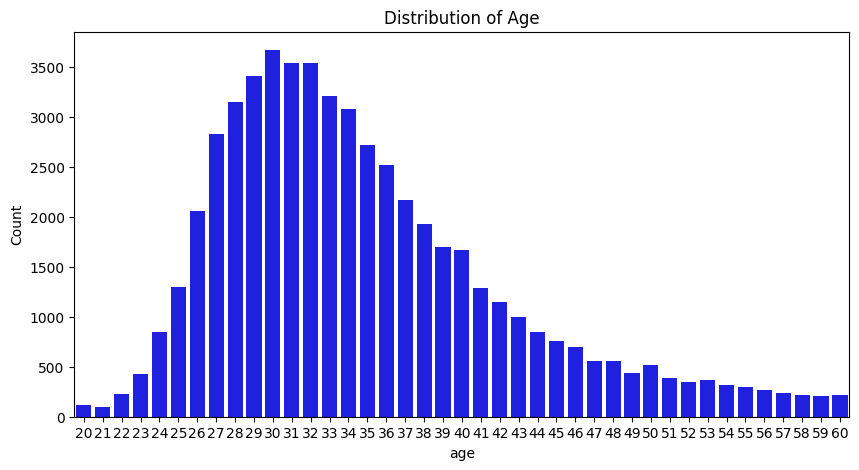

In [14]:
# Visualized distribution of age. As we can see, the data is normally distributed, and the majority of employees age are between 27-35
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'age', color = 'blue')
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [15]:
gender_counts = df['gender'].value_counts()
gender_counts

,count
gender,
m,38496
f,16312


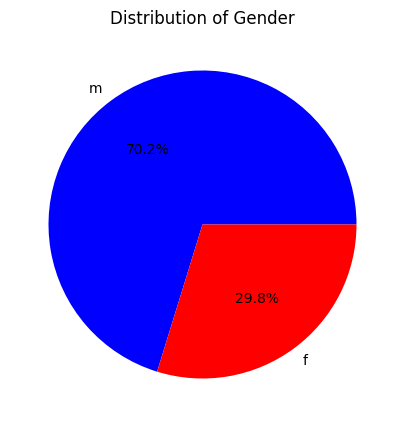

In [16]:
# I analyzed the distribution of gender with a pie chart. We can see that males dominate the company
plt.figure(figsize = (10, 5))
plt.pie(gender_counts, labels=gender_counts.index, colors = ['blue', 'red'], autopct = '%1.1f%%')
plt.title('Distribution of Gender')
plt.show()

In [17]:
department_counts = df['department'].value_counts()
department_counts

,count
department,
Sales & Marketing,16840
Operations,11348
Technology,7138
Procurement,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


<ipython-input-18-83cc525aaff3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='department', data=df, palette='Set1')


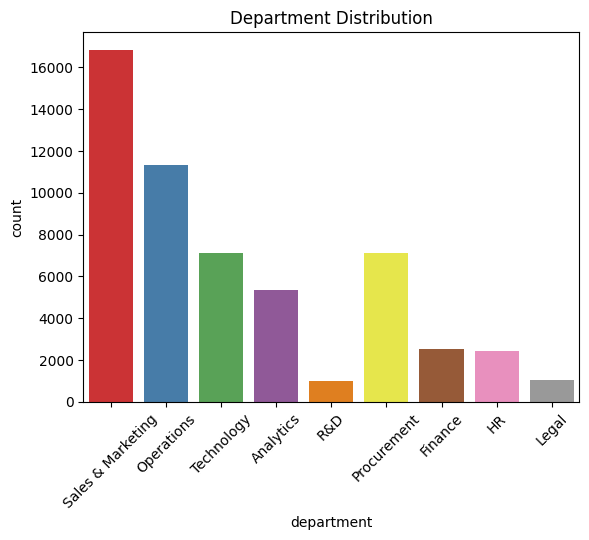

In [18]:
# I used the count plot to visualize department distribution. This company mainly focused on marketing and sales side.
sns.countplot(x='department', data=df, palette='Set1')
plt.title('Department Distribution')
plt.xticks(rotation=45)
plt.show()

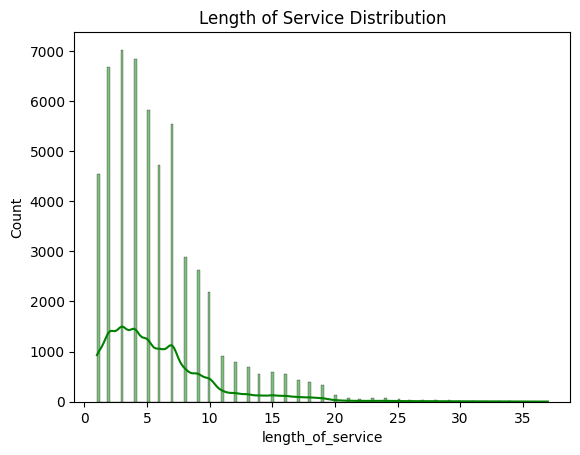

In [19]:
# After I analyzed the length of service with a histogram and added a trend line, it was visible that most employees worked for at least 4 and 5 years.
sns.histplot(df['length_of_service'], kde=True, color='green')
plt.title('Length of Service Distribution')
plt.show()

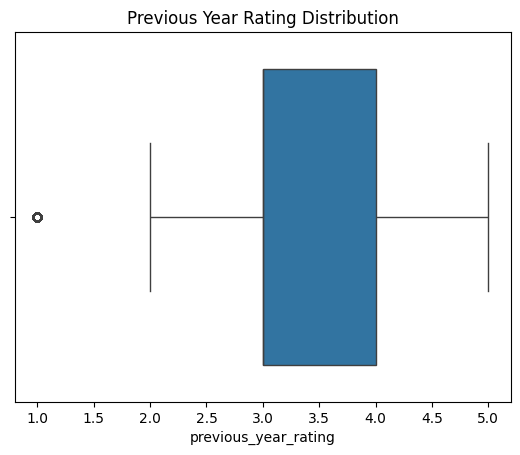

In [20]:
# We can see that from 3.0 to 4.0, it dominates. I concluded that employees had middle-level success in their work.
sns.boxplot(x='previous_year_rating', data=df)
plt.title('Previous Year Rating Distribution')
plt.show()

<ipython-input-21-a8311cceafe2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KPIs_met >80%', data=df, palette='Set1')


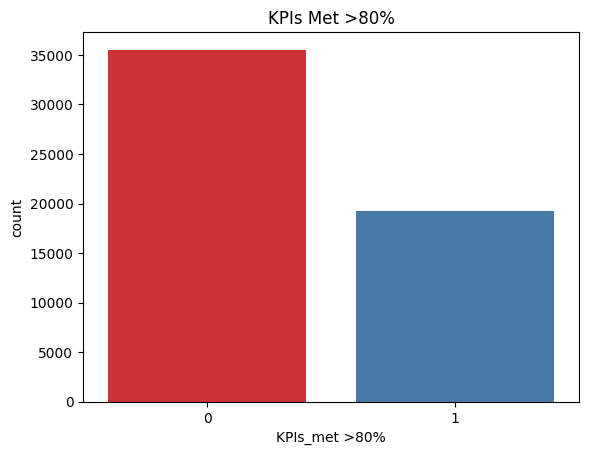

In [21]:
# Here we see that the number of those with a KPI below 80% is almost 2 times less than those with a KPI above 80%.
sns.countplot(x='KPIs_met >80%', data=df, palette='Set1')
plt.title('KPIs Met >80%')
plt.show()

<ipython-input-22-244d0115eada>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='awards_won?', data=df, palette='Pastel2')


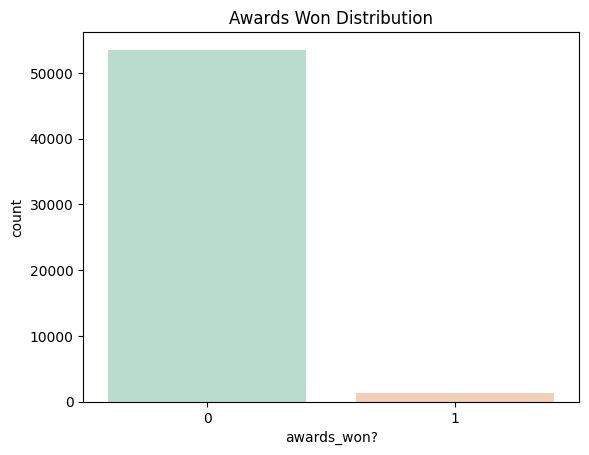

In [22]:
sns.countplot(x='awards_won?', data=df, palette='Pastel2')
plt.title('Awards Won Distribution')
plt.show()

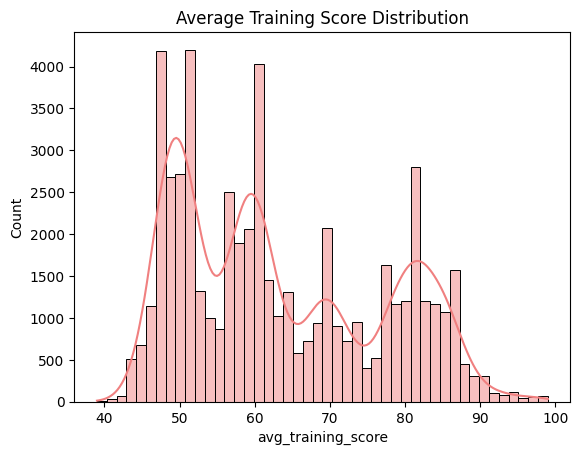

In [23]:
# Here we see how the average training scores are distributed using a histogram and trend line. The majority scored around 50, which is below the average of 64.
sns.histplot(df['avg_training_score'], kde=True, color='lightcoral')
plt.title('Average Training Score Distribution')
plt.show()

**Coding Categorical Data**

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
# Since there are too many unique values ​​in the columns here (which will lead to overfitting in the model) and they less affect the is_promoted column that we will choose as the target value, we need to remove them.
df = df.drop(['region','employee_id','age','recruitment_channel'], axis=1)

In [26]:
# Since gender has two unique values, we can change them to 1 and 0 or TRUE and FALSE.
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [27]:
# There are more than 2 unique values ​​in these two columns, and for the model to work well, we will create a separate column for each unique value here and code it as TRUE and FALSE.
df = pd.get_dummies(df, columns=['education','department'])

In [28]:
df.head()

,gender,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,0,1,5.0,8,1,0,49,0,False,False,True,False,False,False,False,False,False,False,True,False
1,1,1,5.0,4,0,0,60,0,True,False,False,False,False,False,False,True,False,False,False,False
2,1,1,3.0,7,0,0,50,0,True,False,False,False,False,False,False,False,False,False,True,False
3,1,2,1.0,10,0,0,50,0,True,False,False,False,False,False,False,False,False,False,True,False
4,1,1,3.0,2,0,0,73,0,True,False,False,False,False,False,False,False,False,False,False,True


**Model Building (Supervised Learning)**

In [29]:
#We separate target and feature: is_promoted is the target variable, and the rest of the columns are features.
X = df.drop('is_promoted', axis=1)
y = df['is_promoted']

In [30]:
#We divide our model into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RandomForestClassifier

In [31]:
#Here we use the Random Forest machine learning method.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model Evaluation**

In [32]:
#It shows the percentage of observations that the model correctly predicted.
from sklearn.metrics import accuracy_score
y1_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y1_pred)
print("Accuracy:", accuracy)

Accuracy: 0.928388980113118


In [33]:
#It shows the Confusion Matrix, that is, the matrix showing the number of correct and incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y1_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[9843  211]
 [ 574  334]]


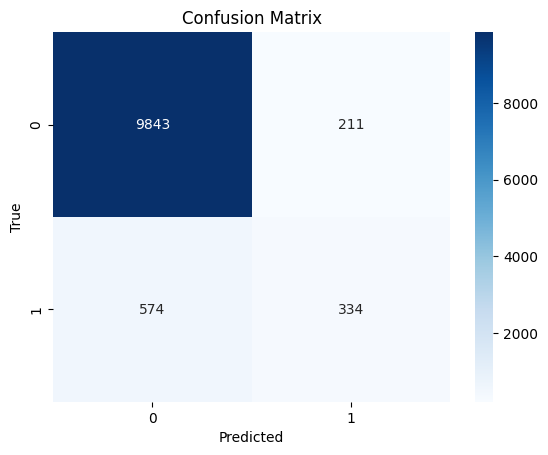

In [34]:
cm = confusion_matrix(y_test, y1_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10054
           1       0.61      0.37      0.46       908

    accuracy                           0.93     10962
   macro avg       0.78      0.67      0.71     10962
weighted avg       0.92      0.93      0.92     10962



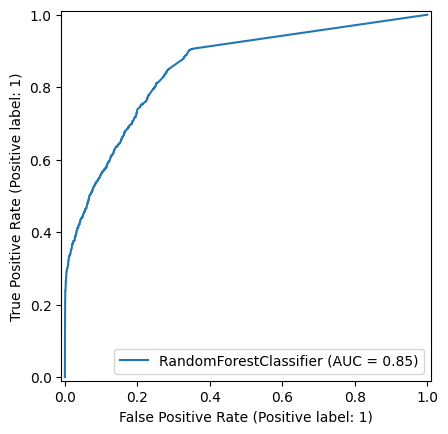

In [35]:
#Classification Report that provides other metrics such as Precision, Recall, and F1-Score.
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
report = classification_report(y_test, y1_pred)
print("Classification Report:")
print(report)
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

Model Strengths:

- Classifies class 0 very accurately (TN is high).

Model Weaknesses:

- Has difficulty classifying class 1 (FN is high).
Recall and Precision are low.

**Model Optimization**

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 20, 'n_estimators': 200}


In [37]:
# Optimized Random Forest model
final_model = RandomForestClassifier(max_depth=20, n_estimators=100)
final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [38]:
# Checking model accuracy
y_pred = final_model.predict(X_test)
upt_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.93


**Final Model Evaluation**

Confusion Matrix:
 [[9843  211]
 [ 574  334]]


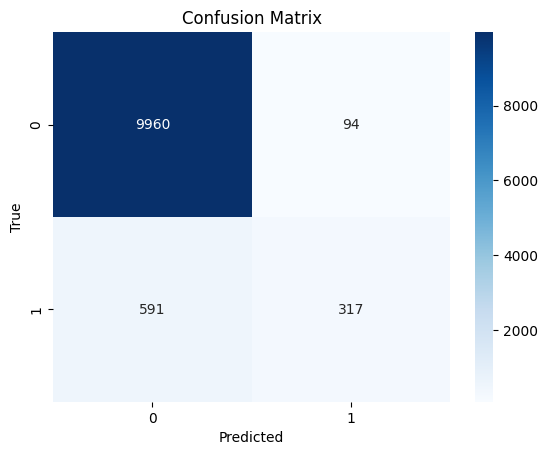

In [39]:
# Confusion Matrix
upt_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
upt_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(upt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     10054
           1       0.61      0.37      0.46       908

    accuracy                           0.93     10962
   macro avg       0.78      0.67      0.71     10962
weighted avg       0.92      0.93      0.92     10962



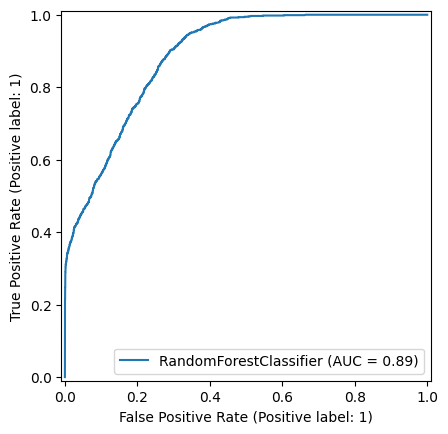

In [40]:
# Classification Report
upt_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# ROC Curve
RocCurveDisplay.from_estimator(final_model, X_test, y_test)
plt.show()


Strengths:
- High accuracy and completeness for class 0:
- The model classifies class 0 examples very well, which can be very important in real-life applications.
- The overall accuracy is high (94%).
- The model generally classifies correctly.

Limitations:
- Low recall for class 1:
- The model fails to correctly identify most of the examples that belong to class 1.
- This is a serious problem, especially if class 1 is critical (e.g., rare and important events).

Class imbalance problem:

- Since class 0 is very dominant, the model tends to classify class 0 correctly.

In [41]:
# Final predictions
y_final_pred = final_model.predict(X_test)

# Save the final results as a Data Frame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_final_pred})
print(results.head())

       Actual  Predicted
40907       0          0
51939       0          0
6978        0          0
12814       0          0
22921       0          0


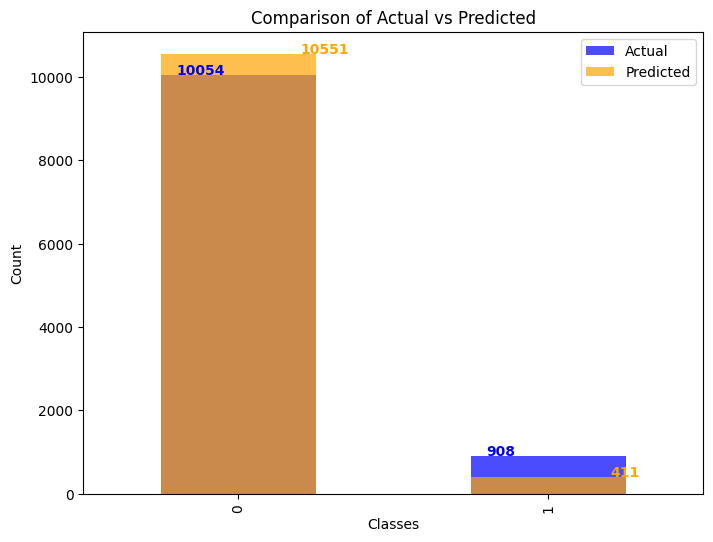

In [42]:
# Bar Chart for Actual vs Predicted with Values on Bars
actual_counts = results['Actual'].value_counts()
predicted_counts = results['Predicted'].value_counts()

# Bar plot
ax = actual_counts.plot(kind='bar', color='blue', label='Actual', alpha=0.7, figsize=(8, 6))
predicted_counts.plot(kind='bar', color='orange', label='Predicted', alpha=0.7, ax=ax)

# Adding values on top of bars
for i, v in enumerate(actual_counts):
    ax.text(i - 0.2, v + 10, str(v), color='blue', fontweight='bold')

for i, v in enumerate(predicted_counts):
    ax.text(i + 0.2, v + 10, str(v), color='orange', fontweight='bold')

# Chart settings
plt.title('Comparison of Actual vs Predicted')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.legend()
plt.show()
